# Mecánica relativista
En este notebook usamos NumPy y SciPy para integrar numéricamente las ecuaciones de movimiento relativistas de una partícula cargada en un campo eléctrico uniforme, y en un campo magnético uniforme. Para integrar numéricamente las ecuaciones de movimiento usamos la rutina "odeint" de SciPy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html). Este tipo de rutinas usualmente requieren ecuaciones diferenciales ordinarias (ODEs) de primer orden, así que definiremos funciones que devuelvan los términos a la derecha de las ecuaciones diferenciales, luego de escribirlas como un conjunto de ODEs de primer orden para dx/dt y d(gamma_v v)/dt. Recuerden ejecutar cada celda aprentando SHIFT+ENTER:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams.update({'font.size': 14})

## Partícula cargada en un campo eléctrico uniforme
Resolvemos numéricamente las ecuaciones de movimiento relativistas para una partícula cargada en un campo eléctrico uniforme en la dirección x.

In [2]:
# Definimos parámetros del sistema
q  = 1. # carga
m  = 1. # masa
E0 = 1. # intensidad del campo eléctrico en z
c  = 1. # velocidad de la luz

# Definimos las ecuaciones diferenciales que queremos integrar para x y gamma_v*vx
def f(z, t):
    x, ux   = z
    gamma_v = np.sqrt(1+(ux/c)**2) # usamos U_mu U^mu = (gamma_v)^2 c^2 - u^2 = c^2, luego (gamma_v)^2 = 1 + (u/c)^2
    dx  = ux/gamma_v               # dx/dt  = vx = ux/gamma_v
    dux = q*E0/m                   # dux/dt = q*E0/m (con ux = gamma_v*vx)
    return dx, dux

# Definimos una función que obtiene la solución integrando numéricamente sobre un vector de tiempo t 
def solve(x):
    f2 = lambda z,t: f(z, t)
    r  = odeint(f2,x0,x)
    return r

In [3]:
# Construimos un vector con el tiempo, desde t=0 hasta 10
time = np.arange(0,5,.1)

# Generamos condiciones iniciales
x  = 0
vx = 0*c                       # Debe ser menor que c
ux = vx/np.sqrt(1-(vx/c)**2)   # ux = gamma_v*vx = vx/sqrt(1-(v/c)^2)
x0 = x, ux

# Resolvemos las ecuaciones diferenciales
sol = solve(time)

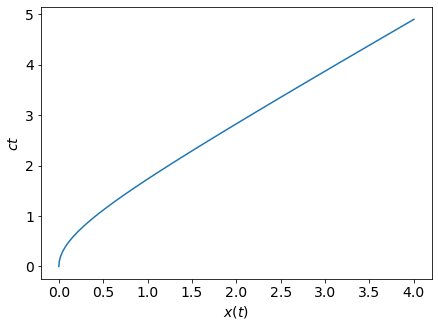

In [4]:
# Graficamos x(t)
plt.figure(figsize=(7,5))
plt.plot(sol[:,0],c*time)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$ct$')
plt.show()

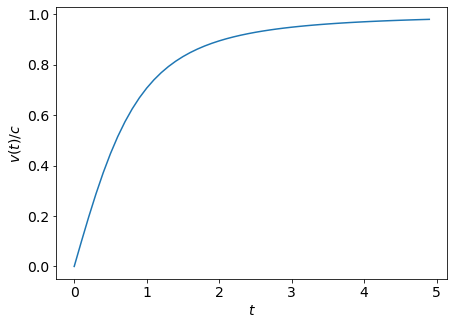

In [5]:
# Graficamos vx(t)
gamma_v = np.sqrt(1+(sol[:,1]/c)**2)  # calculamos gamma_v(t) a partir de ux(t)
vx      = sol[:,1]/gamma_v            # calculamos vx(t) = ux(t)/gamma_v(t)
plt.figure(figsize=(7,5))
plt.plot(time,vx/c)
plt.xlabel(r'$t$')
plt.ylabel(r'$v(t)/c$')
plt.show()

## Partícula cargada en un campo magnético uniforme
Resolvemos numéricamente las ecuaciones de movimiento relativistas para una partícula cargada en un campo magnético uniforme en la dirección z. Consideramos el caso en el que vz=0 a t=0, de forma tal que el movimiento de la partícula está confinado al plano (x,y).

In [6]:
# Definimos parámetros del sistema
q  = 1. # carga
m  = 1. # masa
B0 = 1. # intensidad del campo magnético en z
c  = 1. # velocidad de la luz

# Definimos las ecuaciones diferenciales que queremos integrar
def g(z, t):
    x, y, ux, uy = z
    gamma_v = np.sqrt(1+(ux**2+uy**2)/c**2)
    vx  =  ux/gamma_v
    vy  =  uy/gamma_v
    dx  =  vx               # dx/dt = v
    dy  =  vy
    dux =  q*B0*vy/(m*c)    # du/dt = q/(m*c) v x B
    duy = -q*B0*vx/(m*c)    # du/dt = q/(m*c) v x B
    return dx, dy, dux, duy

# Definimos una función que obtiene la solución integrando numéricamente sobre un vector de tiempo t 
def solve(x):
    g2 = lambda z,t: g(z, t)
    r  = odeint(g2,x0,x)
    return r

In [7]:
# Construimos un vector con el tiempo, desde t=0 hasta 10
time = np.arange(0,50,.01)

# Generamos condiciones iniciales
x  = 0
y  = 0
v  = .9*c                              # módulo de la velocidad inicial (< c)
vx = .001*c                            # debe ser <= v
vy = np.sqrt(v**2-vx**2)               # tomamos vx^2 + vy^2 = v^2 en t = 0
ux = vx/np.sqrt(1-(vx**2+vy**2)/c**2)  # u = gamma_v*v = v/sqrt(1-(v/c)^2)
uy = vy/np.sqrt(1-(vx**2+vy**2)/c**2)
x0 = x, y, ux, uy

# Resolvemos las ecuaciones diferenciales
sol = solve(time)

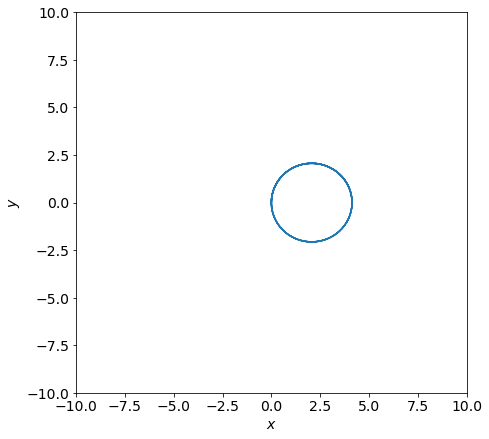

In [8]:
# Graficamos la trayectoria en el plano x,y. Las columas 0 y 1 de "sol" tienen x(t) e y(t)
plt.figure(figsize=(7,7))
plt.plot(sol[:,0],sol[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

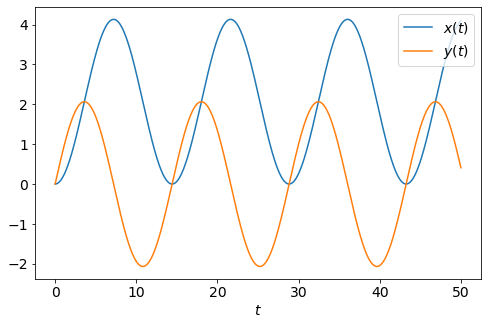

In [9]:
# Graficamos x(t) e y(t)
plt.figure(figsize=(8,5))
plt.plot(time,sol[:,0],label=r'$x(t)$')
plt.plot(time,sol[:,1],label=r'$y(t)$')
plt.legend(loc="upper right")
plt.xlabel(r'$t$')
plt.show()

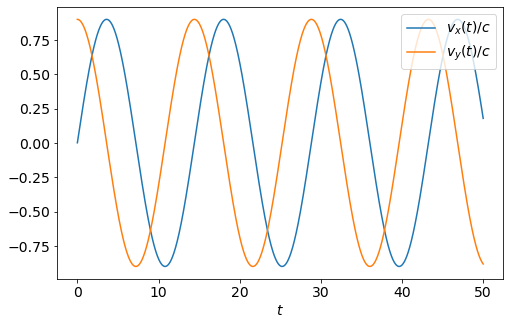

In [10]:
# Graficamos v_x(t) y v_y(t)
gamma_v = np.sqrt(1+(sol[:,2]**2+sol[:,3]**2)/c**2) # calculamos gamma_v(t) a partir de u(t)
vx      = sol[:,2]/gamma_v                          # calculamos v(t) = u(t)/gamma_v(t)
vy      = sol[:,3]/gamma_v                          # calculamos v(t) = u(t)/gamma_v(t)
plt.figure(figsize=(8,5))
plt.plot(time,vx/c,label=r'$v_x(t)/c$')
plt.plot(time,vy/c,label=r'$v_y(t)/c$')
plt.legend(loc="upper right")
plt.xlabel(r'$t$')
plt.show()